In [7]:
# import stuff
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

import cv2

import scipy
from scipy import signal
import h5py, time
from iminuit import Minuit, describe
from pprint import pprint # we use this to pretty print some stuff later
import glob
import pandas as pd
import sys
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile
from discharge_tools import *
from AnaUtil import *
from bisect import bisect_left
from tqdm import tqdm
import datetime as dt
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [36]:
# EXAMPLE 2: Generic 

def gaussian(x,params=list):
    norm = (1/((1/2*params[2])*np.sqrt(np.pi * 2)))
    return params[0] * norm * np.exp(-(np.subtract(x,params[1])**2/(2*params[2]**2)))+params[3]

def chisquare_1d(function, functionparams, data_x, data_y,data_y_error):
    chisquarevalue=np.sum(np.power(np.divide(np.subtract(function(data_x,functionparams),data_y),data_y_error),2))
    ndf = len(data_y)-len(functionparams)
    #print(ndf)
    return (chisquarevalue, ndf)

def chisquare_gaussian(area,mean,sigma,constant):
    return chisquare_1d(function=gaussian,functionparams=[area,mean,sigma,constant],data_x=data_x,data_y=data_y,data_y_error=data_y_error)[0]

def ndf_gaussian():
    return chisquare_1d(function=gaussian,functionparams=[area,mean,sigma,constant],data_x=data_x,data_y=data_y,data_y_error=data_y_error)[1]


In [37]:
Year = "2020"
Month = "02"
Day = "10"
BeadNumber =2
folder_basic = r"/data/new_trap/"+ Year + Month + Day + "/Bead"+str(BeadNumber)
folder_processed = r"/data/new_trap_processed/harmonics_processed/"+ Year + Month + Day + "/Bead"+str(BeadNumber)


In [38]:
measurements=[384]

In [39]:
def load_dir_reduced_to_height(dirname,file_prefix,max_files):
    '''
    
    '''   
    ## Load all filenames in directory
    var_list = []
    files = []
    [files.append(file_) for file_ in os.listdir(dirname) if file_.startswith(file_prefix) if file_.endswith('.h5')]
    files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))        
    step_size = 100
    for j in np.arange(0,max_files,step_size):
        BDFs = [BDF.BeadDataFile(dirname+filename) for filename in files[j:j+step_size]]
        [var_list.append(BDFs[k].bead_height) for k in range(len(BDFs))]
    return var_list

In [40]:
def load_dir_reduced_to_start_time(dirname,file_prefix,max_files):
    '''
    
    '''   
    ## Load all filenames in directory
    var_list = []
    files = []
    [files.append(file_) for file_ in os.listdir(dirname) if file_.startswith(file_prefix) if file_.endswith('.h5')]
    files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))        
    step_size = 100
    for j in np.arange(0,max_files,step_size):
        BDFs = [BDF.BeadDataFile(dirname+filename) for filename in files[j:j+step_size]]
        [var_list.append(BDFs[k].time[0]) for k in range(len(BDFs))]
    return var_list

In [209]:
stime00 = load_dir_reduced_to_start_time("/data/new_trap/20200210/Bead2/Shaking/Shaking384/","Shaking0",50000)

In [191]:
len(stime)

13953

In [193]:
len(stime2)

16000

In [213]:
print(stime00[0]/1e9)
print(stime00[-1]/1e9)
print(stime0[0]/1e9)
print(stime0[-1]/1e9)
print(stime[0]/1e9)
print(stime[7479]/1e9)
print(stime2[0]/1e9)
print(stime2[-1]/1e9)


print(dt.datetime.fromtimestamp(stime00[0]/1e9))
print(dt.datetime.fromtimestamp(stime00[-1]/1e9))
print(dt.datetime.fromtimestamp(stime0[0]/1e9))
print(dt.datetime.fromtimestamp(stime0[-1]/1e9))
print(dt.datetime.fromtimestamp(stime[0]/1e9))
print(dt.datetime.fromtimestamp(stime[7479]/1e9))
print(dt.datetime.fromtimestamp(stime2[0]/1e9))
print(dt.datetime.fromtimestamp(stime2[-1]/1e9))

1581559777.9040523
1581611747.6128595
1581643155.0115223
1581643562.2897012
1581644671.041863
1581722610.5004988
1581791546.7024734
1581958604.1877398
2020-02-12 18:09:37.904052
2020-02-13 08:35:47.612859
2020-02-13 17:19:15.011522
2020-02-13 17:26:02.289701
2020-02-13 17:44:31.041863
2020-02-14 15:23:30.500499
2020-02-15 10:32:26.702473
2020-02-17 08:56:44.187740


In [258]:
#stime_b1 = load_dir_reduced_to_start_time("/data/new_trap/20200210/Bead2/Shaking/Shaking384/","Shaking4",50000)
#stime_b2 = load_dir_reduced_to_start_time("/data/new_trap/20200210/Bead2/Shaking/Shaking384/","Shaking5",50000)
stime_b3 = load_dir_reduced_to_start_time("/data/new_trap/20200210/Bead2/Shaking/Shaking384/","Shaking6",50000)

In [259]:
print(stime_b1[0]/1e9)
print(stime_b1[-1]/1e9)
print(stime_b2[0]/1e9)
print(stime_b2[4952]/1e9)
print(stime_b2[-1]/1e9)
print(stime_b3[0]/1e9)
print(stime_b3[-1]/1e9)



print(dt.datetime.fromtimestamp(stime_b1[0]/1e9))
print(dt.datetime.fromtimestamp(stime_b1[-1]/1e9))
print(dt.datetime.fromtimestamp(stime_b2[0]/1e9))
print(dt.datetime.fromtimestamp(stime_b2[4952]/1e9))
print(dt.datetime.fromtimestamp(stime_b2[-1]/1e9))
print(dt.datetime.fromtimestamp(stime_b3[0]/1e9))
print(dt.datetime.fromtimestamp(stime_b3[-1]/1e9))

1581961384.3974102
1581982431.692155
1581982596.0876503
1582034675.2446127
1582045675.098516
1582048163.086894
1582085941.1935346
2020-02-17 09:43:04.397410
2020-02-17 15:33:51.692155
2020-02-17 15:36:36.087650
2020-02-18 06:04:35.244613
2020-02-18 09:07:55.098516
2020-02-18 09:49:23.086894
2020-02-18 20:19:01.193535


In [41]:
def gaussian_bead_pos_fit(img,axis=0,low_x_lim=500,up_x_lim=800,low_y_lim=420,up_y_lim=550,upper_area=300,up_lim_width=20):

    def chisquare_1d(function, functionparams, data_x, data_y,data_y_error):
        chisquarevalue=np.sum(np.power(np.divide(np.subtract(function(data_x,functionparams),data_y),data_y_error),2))
        ndf = len(data_y)-len(functionparams)
        #print(ndf)
        return (chisquarevalue, ndf)

    def chisquare_gaussian(area,mean,sigma,constant):
        return chisquare_1d(function=gaussian,functionparams=[area,mean,sigma,constant],data_x=data_x,data_y=data_y,data_y_error=data_y_error)[0]
   

    area=0
    mean=0
    sigma=0
    constant=0
    
    if(axis==0):
        img2 = img.transpose()
        data_x = range(1024) # give x data
        data_y = np.mean(img2[low_x_lim:up_x_lim],axis=0) # give y data 
        data_y_error = np.sqrt(data_y) # give y uncertainty
        low_lim_mean = low_y_lim
        up_lim_mean = up_y_lim
        
    if(axis==1):
        data_x = range(1280) # give x data
        data_y = np.mean(img[low_y_lim:up_y_lim],axis=0) # give y data 
        data_y_error = np.sqrt(data_y) # give y uncertainty
        low_lim_mean = low_x_lim
        up_lim_mean = up_x_lim
        
        
    m=Minuit(chisquare_gaussian, 
             area = 100, # set start parameter
             error_area = 1,
             limit_area= (0,upper_area), # if you want to limit things
             #fix_area = "True", # you can also fix it
             mean = np.argmax(data_y),
             error_mean = 1,
             #fix_mean = "False",
             limit_mean = (low_lim_mean,up_lim_mean),
             sigma = 15,
             error_sigma = 1,
             limit_sigma=(0,up_lim_width),
             constant = 10,
             error_constant = 1,
             #fix_constant=0,
             errordef = 1,
             print_level=0)
    #print('Now proceed with the fit.')
    m.migrad(ncall=500000)
    #m.minos(), if you need fancy mapping
    chisquare=m.fval
    return m#m.values['mean']#

In [70]:
var_list = load_dir_reduced_to_height(folder_basic+ "/Shaking/Shaking384/", file_prefix="Shaking3",max_files=16200)

In [8]:
[print(elements) for elements in range(len(var_list)) if var_list[elements]<20]

124
1157
1275
1320
1415
1476
1540
1770
1826
2124
2502
2572
2628
3211
3482
3759
3823
4388
5946
6678
6751


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

(210, 260)

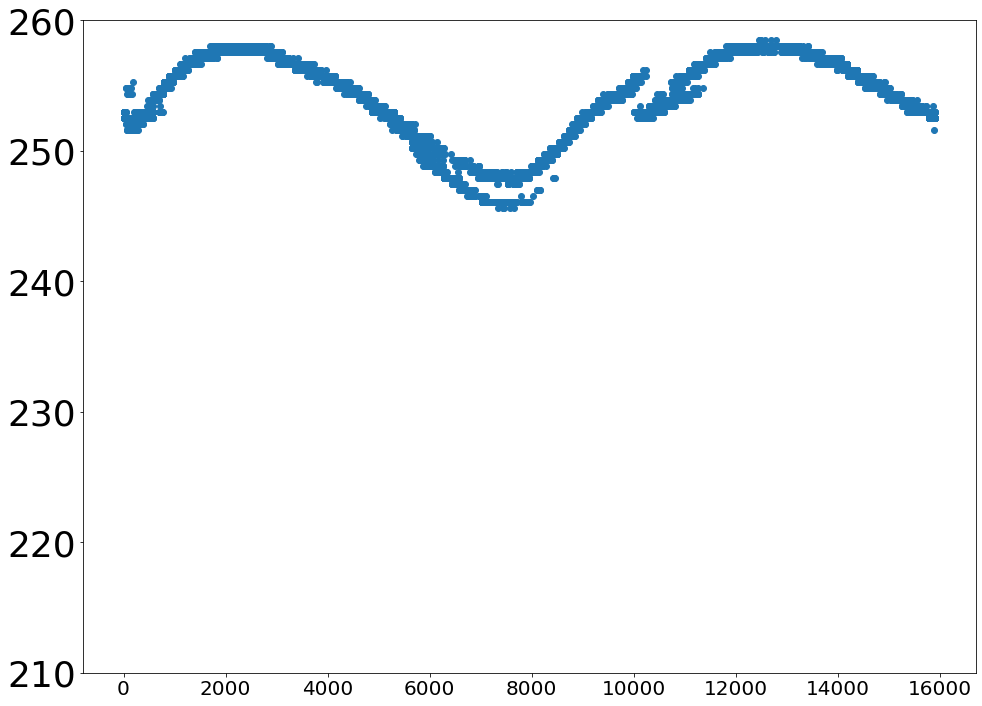

In [74]:
plt.plot(var_list,linestyle="",marker="o")
plt.ylim(210,260)

In [256]:
maxi = []
meani = []
sumi = []
maxl2d = []
maxl = []
max_zoom =[]
pos=[]
s = time.time()

dirname = "/data/new_trap/20200210/Bead2/Shaking/Shaking384/Pictures_3/"
file_prefix = "Shaking"

files = []
[files.append(file_) for file_ in os.listdir(dirname) if file_.startswith(file_prefix) if file_.endswith('.npy')]

for j in tqdm(range(len(files))):
    img = np.load(dirname + "/Shaking%d.npy" %j)
    #img = np.load("/data/new_trap/20200210/Bead2/Shaking/Shaking384/Pictures/Shaking%d.npy" %j)
    maxi.append(np.max(img))
    meani.append(np.mean(img))
    sumi.append(np.sum(img))
    maxl2d.append(np.argmax(img))
    maxl.append(np.argmax(img))    
    img2 = img.transpose()
    max_zoom.append(np.argmax(np.mean(img2[500:800],axis=0)))    
    #pos.append(gaussian_bead_pos_fit(img,axis=0))
e = time.time()



 35%|███▍      | 5581/16000 [00:32<03:07, 55.51it/s]


 55%|█████▌    | 8812/16000 [01:06<00:32, 222.76it/s]


 71%|███████   | 11368/16000 [01:41<00:57, 80.97it/s]


 89%|████████▉ | 14253/16000 [02:15<00:26, 66.81it/s]


100%|██████████| 16000/16000 [02:42<00:00, 98.17it/s] 

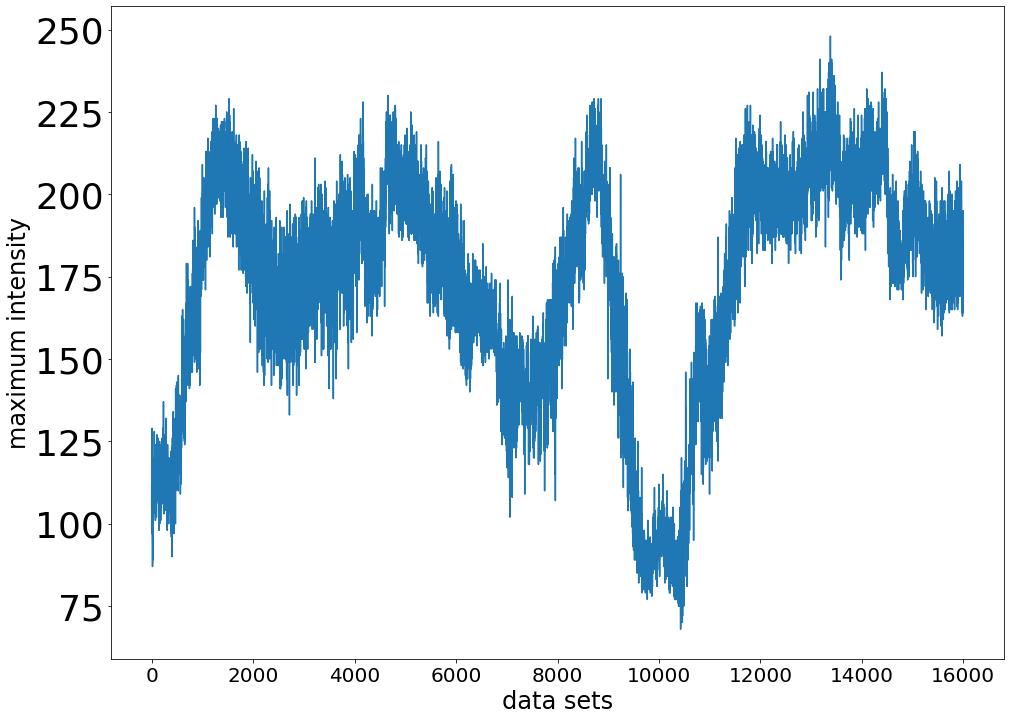

In [257]:
plt.plot(maxi)
plt.xlabel("data sets")
plt.ylabel("maximum intensity")
plt.savefig("Results/Einstein/max_I_shaking3_20200218.png", dpi=300, bbox_inches ="tight" )


(0, 5000000.0)

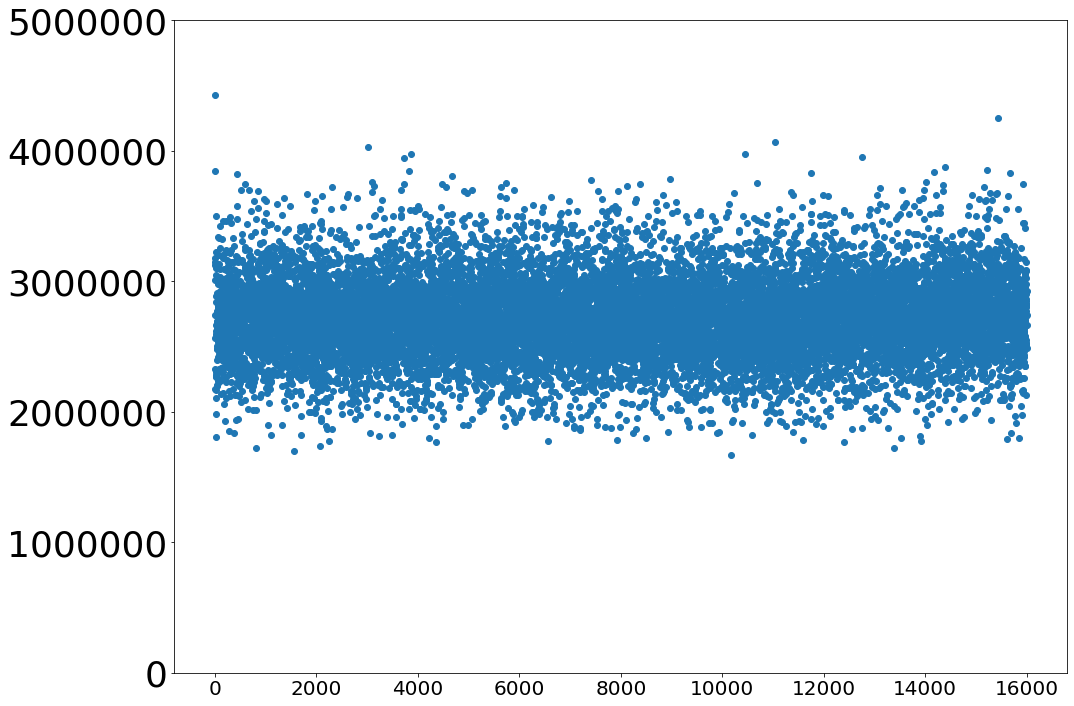

In [230]:
#plt.plot(maxi)
plt.plot(sumi,linestyle="",marker="o")
plt.ylim(0,0.5e7)

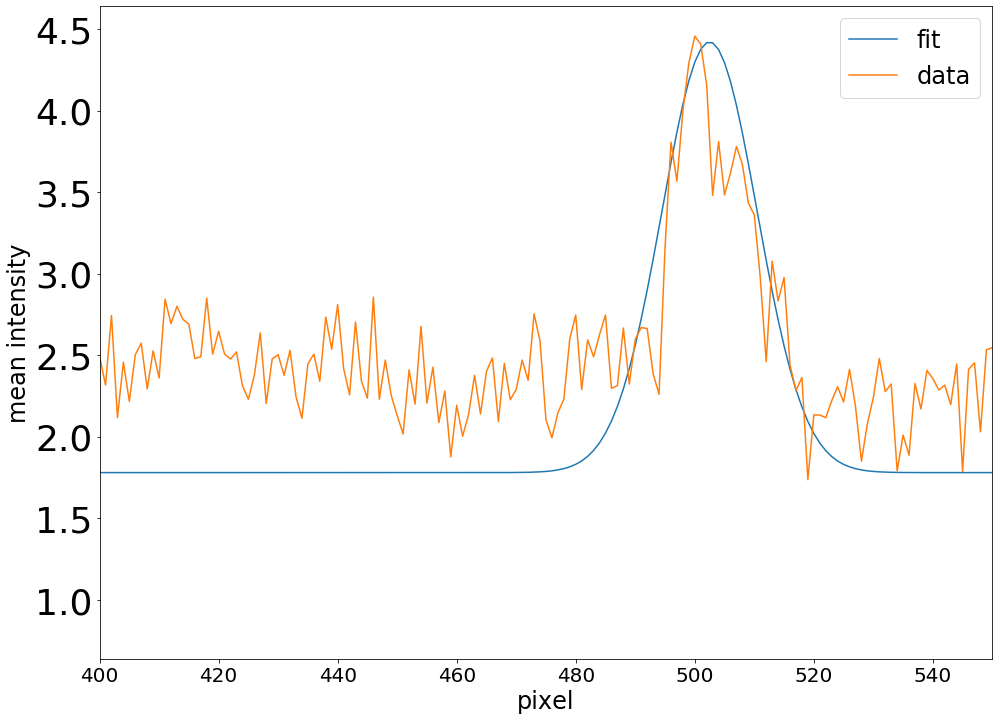

In [255]:
img1 = np.load("/data/new_trap/20200210/Bead2/Shaking/Shaking384/Pictures_5/Shaking1000.npy")
img2 = img1.transpose()
m=gaussian_bead_pos_fit(img1,axis=0,low_x_lim=500,up_x_lim=750,low_y_lim=420,up_y_lim=550,up_lim_width=8)

plt.plot(range(1024),gaussian(range(1024),params=[m.values["area"],m.values["mean"],m.values["sigma"],m.values["constant"]]),label="fit")
plt.plot(range(1024),np.mean(img2[500:800],axis=0), label = "data")
plt.xlabel("pixel")
plt.ylabel("mean intensity")
plt.legend()
plt.xlim(400,550)
#plt.plot(np.mean(img2[500:800],axis=0))
#plt.savefig("Results/Einstein/gaus_new_zoom_20200218.png", dpi=300, bbox_inches ="tight" )
plt.show()

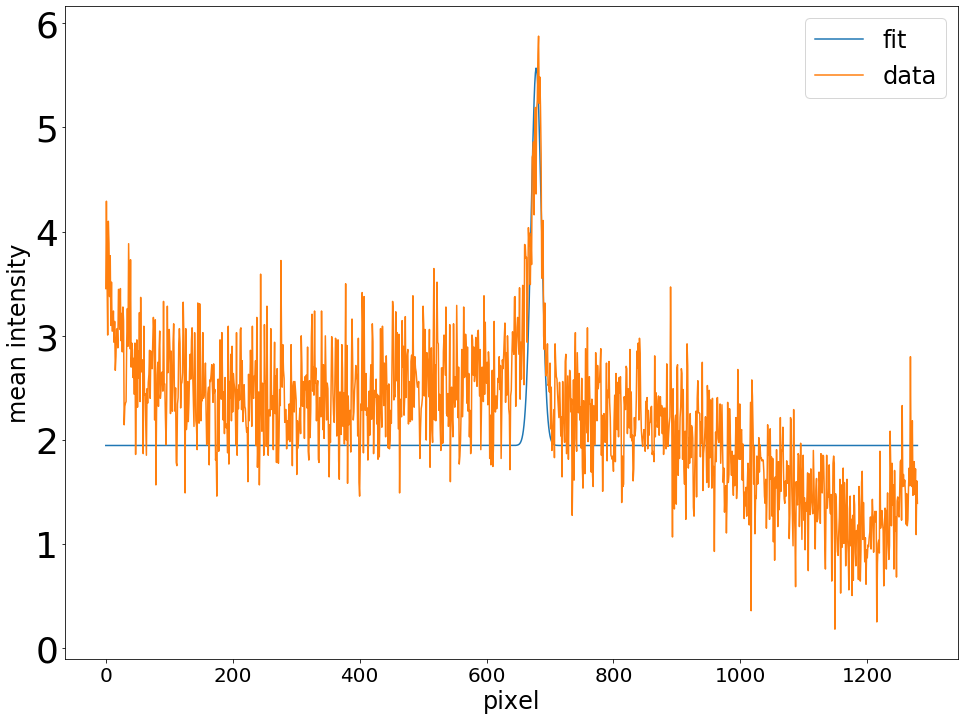

In [250]:
img1 = np.load("/data/new_trap/20200210/Bead2/Shaking/Shaking384/Pictures_5/Shaking4000.npy")
img2 = img1.transpose()
m=gaussian_bead_pos_fit(img1,axis=1,low_x_lim=500,up_x_lim=750,low_y_lim=420,up_y_lim=550,up_lim_width=8)

plt.plot(range(1280),gaussian(range(1280),params=[m.values["area"],m.values["mean"],m.values["sigma"],m.values["constant"]]),label="fit")
plt.plot(range(1280),np.mean(img1[420:550],axis=0), label = "data")
plt.xlabel("pixel")
plt.ylabel("mean intensity")
plt.legend()
#plt.xlim(400,550)
#plt.plot(np.mean(img2[500:800],axis=0))
#plt.savefig("Results/Einstein/gaus_new_zoom_20200218.png", dpi=300, bbox_inches ="tight" )
plt.show()

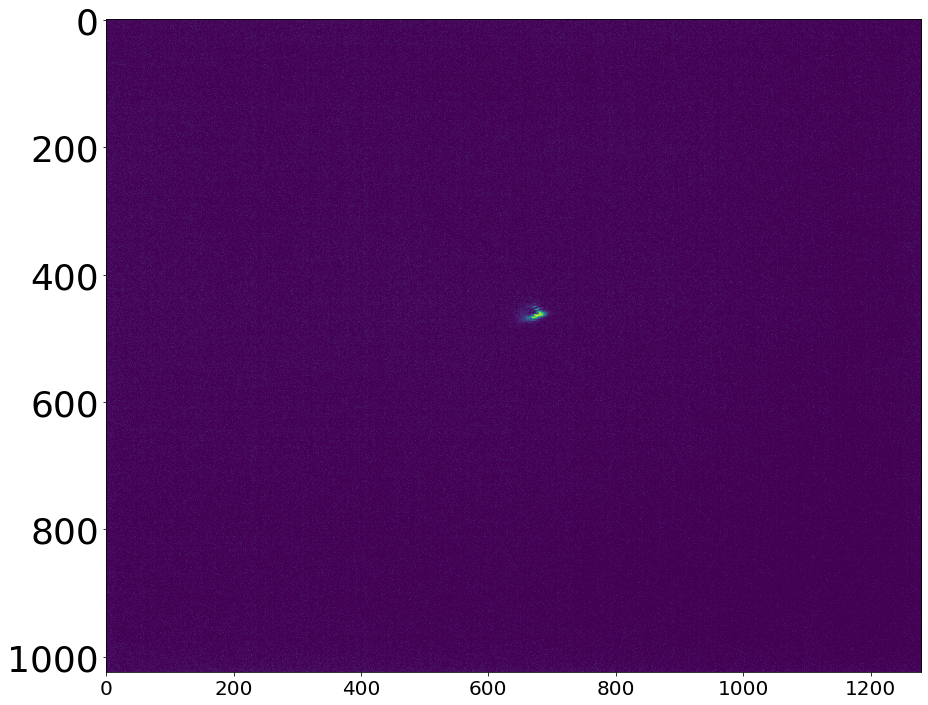

In [53]:
plt.imshow(np.load("/data/new_trap/20200210/Bead2/Shaking/Shaking384/Pictures_2/Shaking300.npy"))

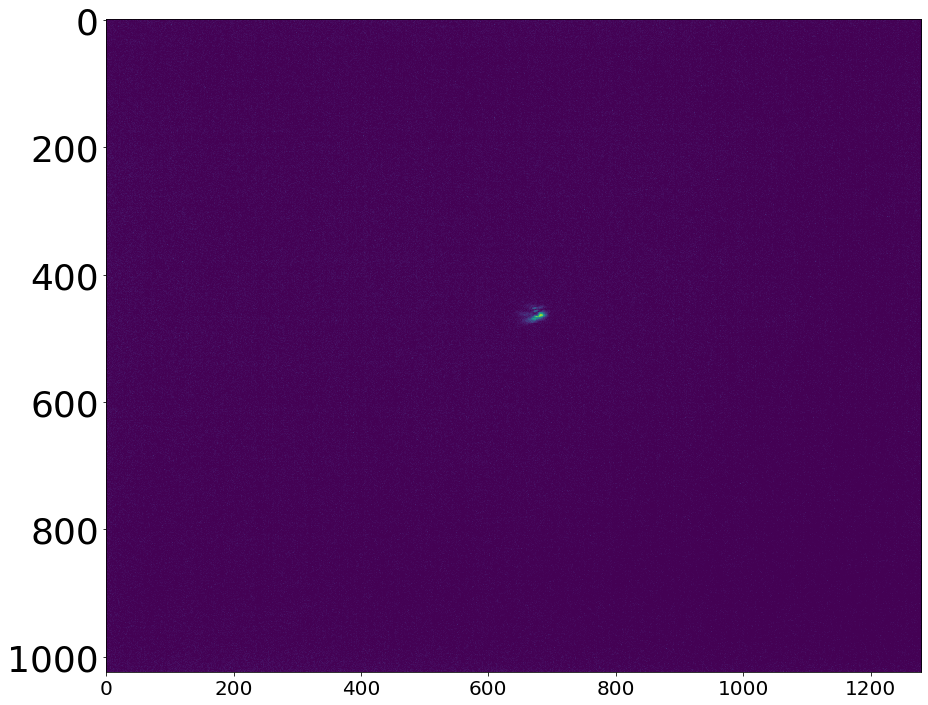

In [63]:
plt.imshow(np.load("/data/new_trap/20200210/Bead2/Shaking/Shaking384/Pictures_2/Shaking1100.npy"))

In [1]:
plt.imshow(np.subtract(np.load("/data/new_trap/20200210/Bead2/Shaking/Shaking384/Pictures_2/Shaking3000.npy"),np.load("/data/new_trap/20200210/Bead2/Shaking/Shaking384/Pictures_2/Shaking4000.npy")))
plt.ylim(400,500)
plt.xlim(600,800)

NameError: name 'plt' is not defined

In [3]:
def load_img_files(path):
    # read in the data 
    files = glob.glob(path)
    img_files = []
    for i in range(0,len(files)):
        img_files.append(cv2.imread(files[i],0))
    print(files) 
    return img_files

In [4]:
images1 = load_img_files("/data/new_trap/20200210/Bead2/Test_pictures/Lowering_20200220/after_lowering_250_20.bmp")

['/data/new_trap/20200210/Bead2/Test_pictures/Lowering_20200220/after_lowering_250_20.bmp']


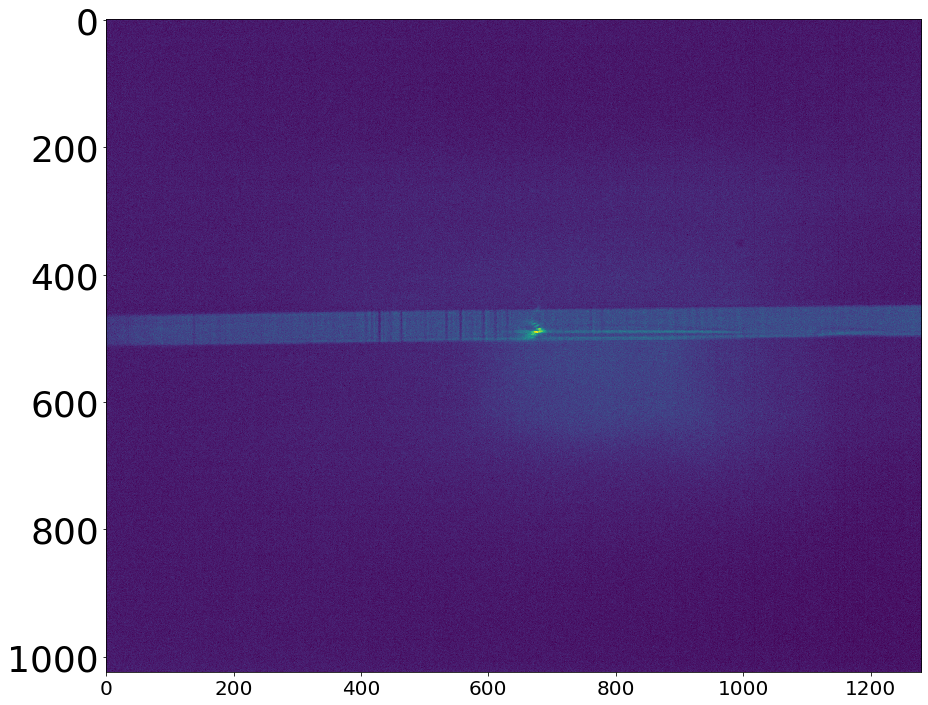

In [8]:
plt.imshow(images1[0])

In [160]:
images2 = load_img_files("/data/new_trap/20200210/Bead2/Test_pictures/Lowering_20200220/after_lowering_250_20.bmp")

['/data/new_trap/20200210/Bead2/Test_pictures/Lowering_20200220/after_lowering_250_20.bmp']


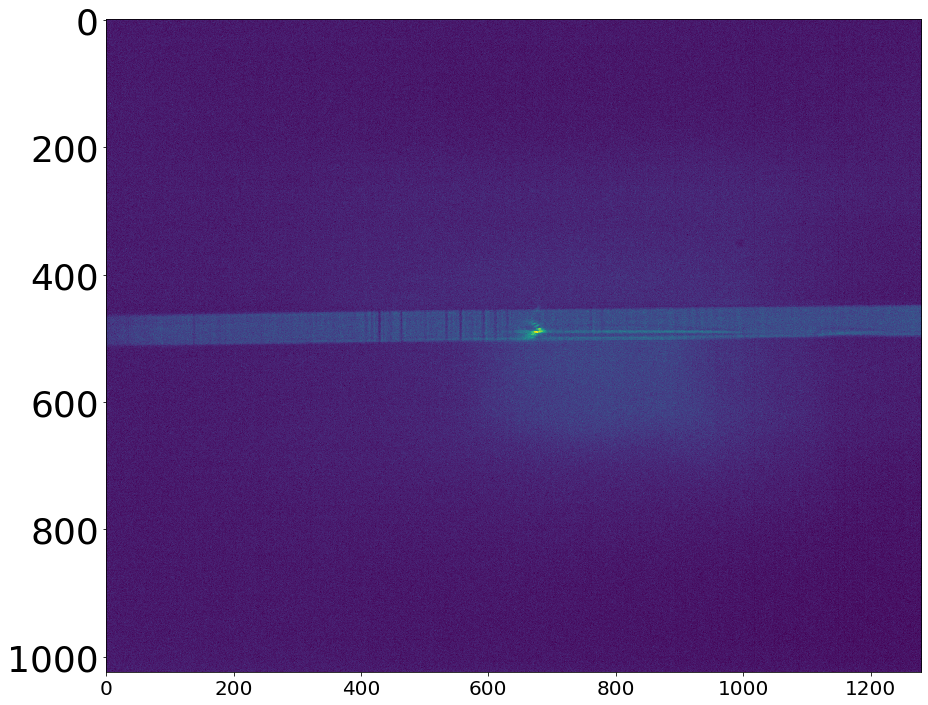

In [161]:
plt.imshow(images2[0])

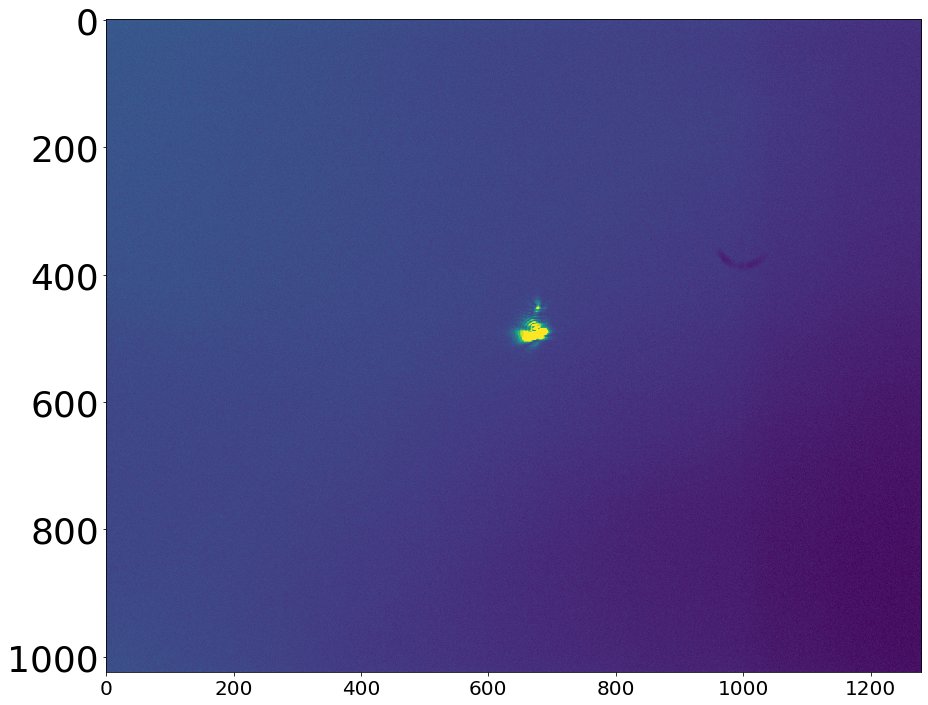

In [20]:
plt.imshow(np.load("/data/new_trap/20200210/Bead2/Shaking/Stability384/Pictures_Stability0/499.npy"))

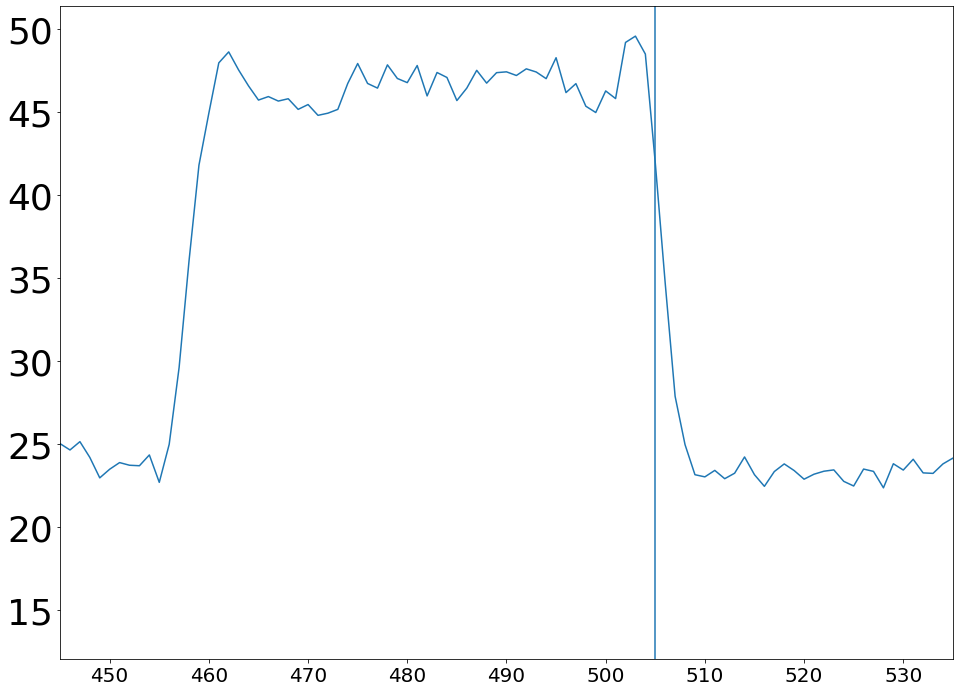

In [91]:

plt.plot(np.mean(img[0].transpose()[400:500],axis=0))
#plt.plot(np.mean(images1[0].transpose()[400:500],axis=0),marker="*")
#plt.plot(np.mean(images1[0].transpose()[600:680],axis=0),marker="*")
#plt.plot(np.mean(np.load("/data/new_trap/20200210/Bead2/Shaking/Stability384/Pictures_Stability0/0.npy").transpose()[600:680],axis=0),marker="*")
#plt.plot(np.mean(images1[0].transpose()[680:780],axis=0))

plt.xlim(445,535)
plt.axvline(505)         


In [92]:
1024*0.46-0.46*505

238.74

In [74]:
img = load_img_files("/data/new_trap/20200210/Bead2/Test_pictures/Lowering_20200220/202002201756.bmp")

['/data/new_trap/20200210/Bead2/Test_pictures/Lowering_20200220/202002201756.bmp']


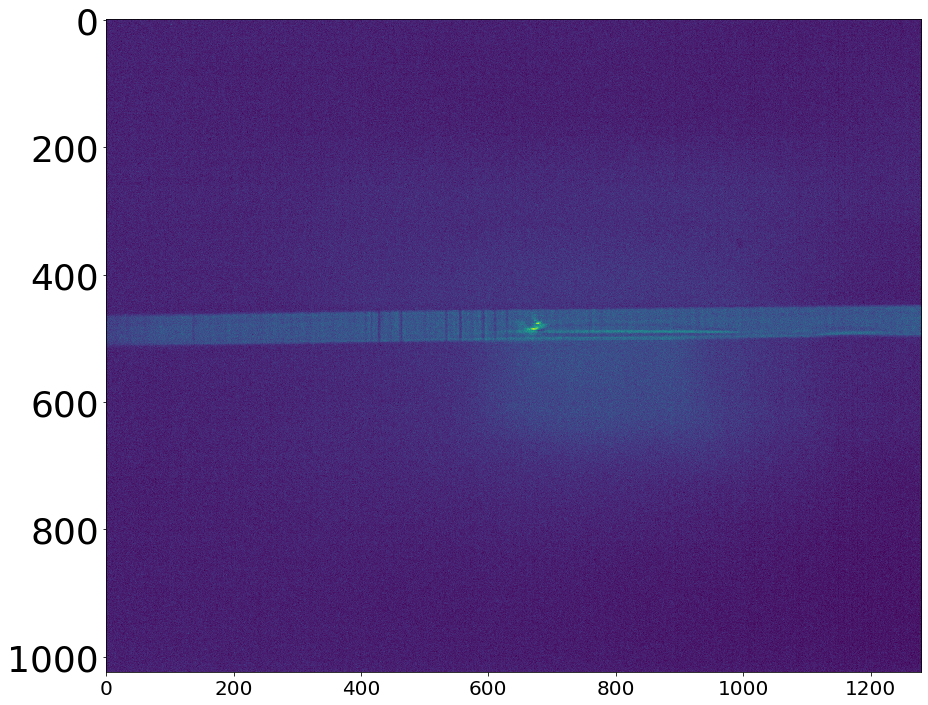

In [75]:
plt.imshow(img[0])

In [62]:
m = gaussian_bead_pos_fit(img1,axis=0)

In [63]:
print(m.values['mean'])

478.76858815878455


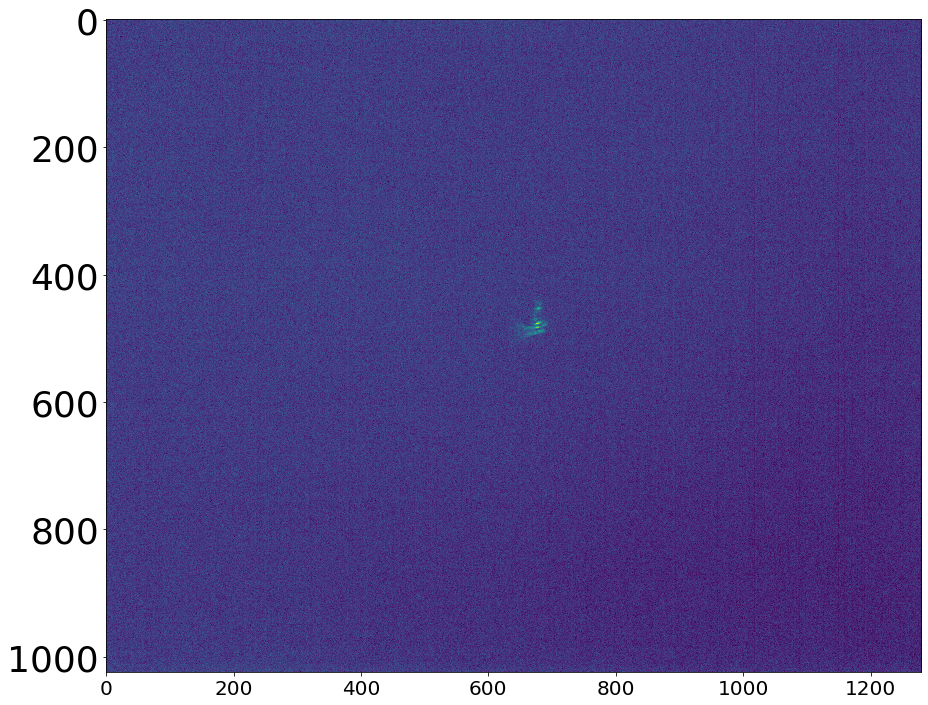

In [71]:
plt.imshow(img1)

In [23]:
1024*0.46-489*0.46

246.10000000000002

In [34]:
images3 = load_img_files("/data/new_trap/20200210/Bead2/Test_pictures/side_m_250_20.bmp")

['/data/new_trap/20200210/Bead2/Test_pictures/side_m_250_20.bmp']


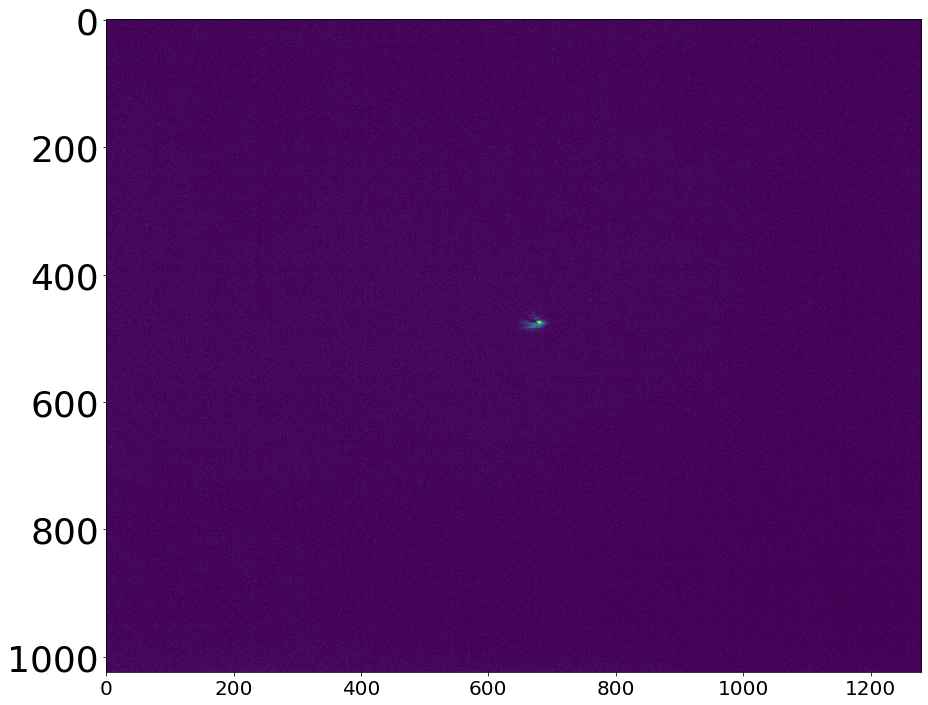

In [36]:
plt.imshow(images3[0])